In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data'
df = pd.read_csv(url, sep='\t', header=0)
df = df.drop('Unnamed: 0', axis=1)
print(df)

      lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
0  -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0   
1  -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0   
2  -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20   
3  -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0   
4   0.751416  3.432373   62 -1.386294    0 -1.386294        6      0   
5  -1.049822  3.228826   50 -1.386294    0 -1.386294        6      0   
6   0.737164  3.473518   64  0.615186    0 -1.386294        6      0   
7   0.693147  3.539509   58  1.536867    0 -1.386294        6      0   
8  -0.776529  3.539509   47 -1.386294    0 -1.386294        6      0   
9   0.223144  3.244544   63 -1.386294    0 -1.386294        6      0   
10  0.254642  3.604138   65 -1.386294    0 -1.386294        6      0   
11 -1.347074  3.598681   63  1.266948    0 -1.386294        6      0   
12  1.613430  3.022861   63 -1.386294    0 -0.597837        7   

In [11]:
names = df.columns.tolist()
names_x = names[0:7]
name_y = names[8]
print("Target variable: %s" % name_y)
print("Predictors:        " +str(names_x))

X0 = np.array(df[names_x])
y0 = np.array(df[name_y])

nsamp = X0.shape[0]
nfeatures = X0.shape[1]
print("")
print("num samples = %d, num features = %d" % (nsamp, nfeatures))

Target variable: lpsa
Predictors:        ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason']

num samples = 97, num features = 7


In [12]:
import sklearn.preprocessing

X = sklearn.preprocessing.scale(X0)
y = sklearn.preprocessing.scale(y0)

[[-1.64586143 -2.01663373 -1.87210098 -1.03002898 -0.52565748 -0.86765522
  -1.04757113]
 [-1.9993129  -0.72575948 -0.79198919 -1.03002898 -0.52565748 -0.86765522
  -1.04757113]
 [-1.58702059 -2.20015441  1.36823439 -1.03002898 -0.52565748 -0.86765522
   0.34440695]
 [-2.17817387 -0.8121913  -0.79198919 -1.03002898 -0.52565748 -0.86765522
  -1.04757113]
 [-0.5105128  -0.46121762 -0.25193329 -1.03002898 -0.52565748 -0.86765522
  -1.04757113]
 [-2.04670586 -0.93880639 -1.87210098 -1.03002898 -0.52565748 -0.86765522
  -1.04757113]
 [-0.5226677  -0.3646778   0.01809466  0.35670122 -0.52565748 -0.86765522
  -1.04757113]
 [-0.56020767 -0.20984103 -0.79198919  0.99529051 -0.52565748 -0.86765522
  -1.04757113]
 [-1.81362657 -0.20984103 -2.2771429  -1.03002898 -0.52565748 -0.86765522
  -1.04757113]
 [-0.9610521  -0.90192675 -0.11691932 -1.03002898 -0.52565748 -0.86765522
  -1.04757113]
 [-0.93418834 -0.05819996  0.15310863 -1.03002898 -0.52565748 -0.86765522
  -1.04757113]
 [-2.30021799 -0.0710

In [15]:
from sklearn import linear_model

ns_train = nsamp//2
ns_test = nsamp - ns_train
X_tr = X[:ns_train,:]     # Gets the first ns_train rows of X
y_tr = y[:ns_train]       # Gets the correspoinding rows of y

print("num samples train = %d, test = %d" % (ns_train, ns_test))

num samples train = 48, test = 49


In [17]:
regr = linear_model.LinearRegression()
regr.fit(X_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Normalized training RSS=0.497834


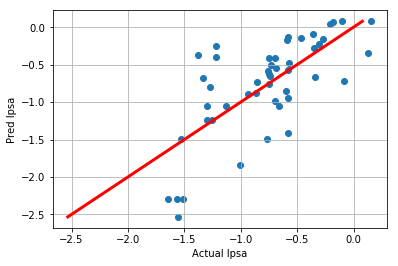

In [18]:
# Measure normalized RSS
y_tr_pred = regr.predict(X_tr)
RSS_tr = np.mean((y_tr_pred-y_tr)**2)/(np.std(y_tr)**2)
print("Normalized training RSS=%f" % RSS_tr)

# Scatter plot
plt.scatter(y_tr_pred, y_tr)
plt.xlabel('Actual lpsa')
plt.ylabel('Pred lpsa')
ymin = np.min(y_tr)
ymax = np.max(y_tr)
plt.plot([ymin,ymax], [ymin,ymax], 'r-', linewidth=3)
plt.grid()
plt.show()

In [19]:
X_ts = X[ns_train:,:]
y_ts = y[ns_train:]
y_ts_pred = regr.predict(X_ts)
RSS_rel_ts = np.mean((y_ts_pred-y_ts)**2)/(np.std(y_ts)**2)
print("Normalized test RSS = {0:f}".format(RSS_rel_ts))

Normalized test RSS = 4.539225


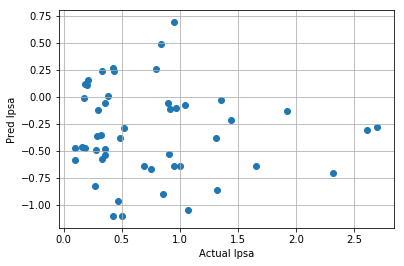

In [20]:
plt.scatter(y_ts,y_ts_pred)
plt.xlabel('Actual lpsa')
plt.ylabel('Pred lpsa')
plt.grid()
plt.show()

In [21]:
import  sklearn.model_selection

In [27]:
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold, shuffle = True)

model = linear_model.Lasso(warm_start=True)

nalpha = 100
alphas = np.logspace(-3, 1, nalpha)

mse = np.zeros((nalpha, nfold))
for ifold, ind in enumerate(kf.split(X)):
    
    Itr, Its = ind
    X_tr = X[Itr, :]
    y_tr = y[Itr]
    X_ts = X[Its,:]
    y_ts = y[Its]
    
    for ia, a in enumerate(alphas):
        model.alpha = a
        model.fit(X_tr, y_tr)
        
        y_ts_pred = model.predict(X_ts)
        mse[ia,ifold] = np.mean((y_ts_pred-y_ts)**2)
        
    

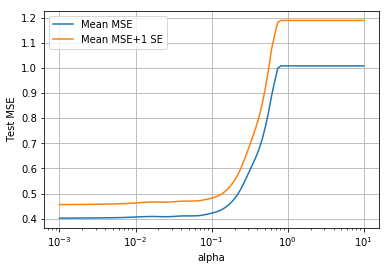

In [28]:
# Compute the mean and standard deviation over the different folds.
mse_mean = np.mean(mse,axis=1)
mse_std = np.std(mse,axis=1) / np.sqrt(nfold-1)

# Plot the mean MSE and the mean MSE + 1 std dev
plt.semilogx(alphas, mse_mean)
plt.semilogx(alphas, mse_mean+mse_std)
plt.legend(['Mean MSE', 'Mean MSE+1 SE'],loc='upper left')
plt.xlabel('alpha')
plt.ylabel('Test MSE')
plt.grid()
plt.show()

Optimal alpha = 0.166810


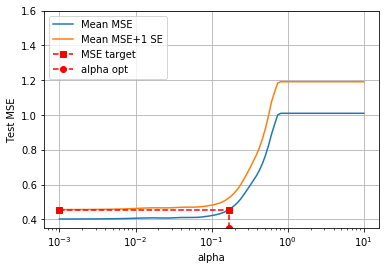

In [29]:
# Find the minimum MSE and MSE target
imin = np.argmin(mse_mean)
mse_tgt = mse_mean[imin] + mse_std[imin]
alpha_min = alphas[imin]

# Find the least complex model with mse_mean < mse_tgt
I = np.where(mse_mean < mse_tgt)[0]
iopt = I[-1]
alpha_opt = alphas[iopt]
print("Optimal alpha = %f" % alpha_opt)
# Plot the mean MSE and the mean MSE + 1 std dev
plt.semilogx(alphas, mse_mean)
plt.semilogx(alphas, mse_mean+mse_std)

# Plot the MSE target
plt.semilogx([alpha_min,alpha_opt], [mse_tgt,mse_tgt], 'rs--')

# Plot the optimal alpha line
plt.semilogx([alpha_opt,alpha_opt], [0.35,mse_mean[iopt]], 'ro--')

plt.legend(['Mean MSE', 'Mean MSE+1 SE', 'MSE target','alpha opt'],loc='upper left')
plt.xlabel('alpha')
plt.ylabel('Test MSE')
plt.ylim([0.35,1.6])
plt.grid()
plt.show()

In [30]:
model.alpha = alpha_opt
model.fit(X, y)

for i, c in enumerate(model.coef_):
    print("%8s %f" % (names_x[i], c))

  lcavol 0.464526
 lweight 0.115832
     age 0.000000
    lbph 0.000000
     svi 0.131102
     lcp 0.000000
 gleason 0.000000
